# COM6031 CW1 

## Scenario 1 (Document Creation System) - Abstract Factory
In this scenario the **abstract factory** design pattern will be used to implement a simple **document creation system**.

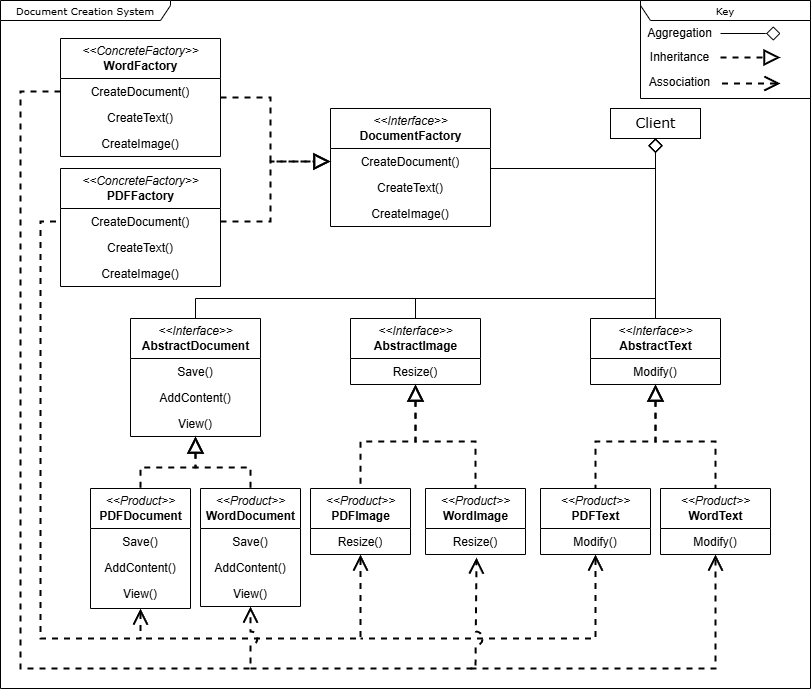

It will consist of 2 document types: **Word Documents** and **PDF Documents**. Each document type will have three available functions: **CreateDocument**, **CreateTable**, and **CreateImage**. For the purposes of this example, placeholders will be used in place of actual functions to create document features. It will be made clear from which concrete factory/product the function call returns from.

**Validation and error checking** will also be **excluded** from this example, with the focus being placed on simplicity and demonstrating the suitability of the abstract factory pattern for this scenario. Since the abstract factory pattern only defines how to create related families of objects, not how to use them, in this example the 'client' will be a class with a single 'report' function. The report will contain each of the products.

[DEFINITELY AT SOME POINT IN THE FUTURE TALK ABOUT HOW PERHAPS YOU COULD HAVE A PARENT INTERFACE KNOWN AS 'COMPONENT' WHICH WOULD ALLOW FOR EASIER TYPE CHECKING AND VALIDATION WHEN ADDING COMPONENTS TO THE DOCUMENT. BOTH IMAGE AND TABLE INTERFACES WOULD INHERIT FROM 'COMPONENT' AND EVERYTHING ELSE WOULD FUNCTION AS NORMAL. POSSIBLY DO THIS FOR THE ENHANCED EXAMPLE? ENHANCED EXAMPLE CAN ALSO HAVE TYPE SPECIFIERS FOR PARAMETERS, USE ABC LIBRARY FOR PROPER ABSTRACT FUNCTIONS ETC. PERHAPS ALSO THE INTERFACES METHODS SHOULD HAVE 'IMPLEMENT THIS FUNCTION' TEXT OR WHATEVER THE WAY TO DO IT IN PYTHON IS. ENHANCEMENT SECTION ALMOST DEFINITELY HAS TO TALK ABOUT THE KIND-OF BUG WITH THE TEXT MODIFY FUNCTION AND HOW IT WOULDN'T UPDATE IN THE MAIN DOCUMENT UNLESS RE-ADDED TO THE CONTENT. THE WAY TO FIX THIS WOULD BE TO HAVE THE INTERFACES IMPLEMENT THE PARENT 'COMPONENT' INTERFACE WHICH WOULD HAVE A 'RENDER' METHOD WHICH WOULD TELL THE DOCUMENT HOW TO RENDER THAT INTO TEXT MEANING THAT THE MODIFIED TEXT WOULD BE RENDERED EVERY TIME THE DOCUMENT IS VIEWED INSTEAD OF JUST WHEN ADDED TO THE CONTENT]

## Interfaces

### Abstract Products

In [1]:
class AbstractDocument():
    """Abstract Document Interface."""
    def __init__(self, filename):
        """Initialise contents and filename.

        Args:
            filename (string): Document name.
        """
        self._filename = filename   # Initialise filename
        self._content = []          # Initialise document content
        
    def Save(self, filepath):
        """Save document to given file path.

        Args:
            filepath (path): file path in which to save document.
        """
        pass
        
    def AddContent(self, content):
        """Add content from same family to document.

        Args:
            content (Family Product): Document content produced by concrete factory of same family.
        """
        pass 
        
    def View(Self):
        """Return entire contents of document"""
        pass

class AbstractImage():
    """Abstract Image Interface"""
    def __init__(self, path, width, height):
        """Initialise image file path, width, and height.

        Args:
            path (path): File path to image.
            width (int): Desired image width in pixels.
            height (int): Desired image height in pixels.
        """
        self._path = path       # Initialise image path
        self._width = width     # Initialise image width
        self._height = height   # Initialise image height
        
    def Resize(self):
        """Resize image"""
        pass

class AbstractText():
    """Abstract Text Interface"""
    def __init__(self, text):
        """Initialise text.

        Args:
            text (string): Initial text.
        """
        self._text = text
        
    def Modify(self, text):
        """Modify product text.

        Args:
            text (string): New text.
        """
        pass

### Concrete Products

In [2]:
class PDFDocument(AbstractDocument):
    """Concrete Document Factory for PDF Documents"""
    def Save(self, filepath):
        """PDF-specific implementation of Save method"""
        print(f'Saved PDF Document to {filepath}') # Print feedback to the console
    
    def AddContent(self, content):
        """PDF-specific implementation of AddContent method"""
        self._content.append(content) # Add content to private content array
        print("Added content to PDF Document: {}".format(str(content))) # Print feedback to the console

    def View(self):
        """PDF-specific implementation of View method"""
        print(f'\nFiletype: PDF \nFilename: {self._filename} \nContents: \n' + "".join(str(x) for x in self._content) + "\n") # Display entire document (using __str__ method of products) and metadata

class WordDocument(AbstractDocument):
    """Concrete Document Factory for Word Documents"""
    def Save(self, filepath):
        """Word-specific implementation of Save method"""
        print(f'Saved Word Document to {filepath}') # Print feedback to the console
    
    def AddContent(self, content):
        """Word-specific implementation of AddContent method"""
        self._content.append(content) # Add content to private content array
        print("Added content to Word Document: {}".format(str(content))) # Print feedback to the console

    def View(self):
        """Word-specific implementation of View method"""
        print(f'\nFiletype: Word \nFilename: {self._filename} \nContents: \n' + "".join(str(x) for x in self._content) + "\n") # Display entire document (using __str__ method of products) and metadata

class PDFImage(AbstractImage):
    """PDF Image Product"""
    def Resize(self, width, height):
        """PDF-specific implementation of Resize method"""
        self._width = width
        self._height = height
        print(f'Resized PDF Image at path: {self._path}') # Print feedback to the console
    def __str__(self):
        return f'[PDF Image, {self._width}x{self._height}, @ {self._path}]' # Crude method to avoid the need for a 'render' function for each product

class WordImage(AbstractImage):
    """Word Image Product"""
    def Resize(self, width, height):
        """Word-specific implementation of Resize method"""
        self._width = width
        self._height = height
        print(f'Resized Word Image at path: {self._path}') # Print feedback to the console
    def __str__(self):
        return f'[Word Image, {self._width}x{self._height}, @ {self._path}]' # Crude method to avoid the need for a 'render' function for each product

class PDFText(AbstractText):
    """PDF Text Product"""
    def Modify(self, text):
        """PDF-specific implementation of Modify method"""
        self._text = text # Modify text content
        print("Modified PDF Text") # Print feedback to the console
    def __str__(self):
        return f'[PDF Text] {self._text}' # Crude method to avoid the need for a 'render' function for each product

class WordText(AbstractText):
    """Word Text Product"""
    def Modify(self, text):
        """Word-specific implementation of Modify method"""
        self._text = text # Modify text content
        print("Modified Word Text") # Print feedback to the console
    def __str__(self):
        return f'[Word Text] {self._text}' # Crude method to avoid the need for a 'render' function for each product

### Abstract Document Factory

In [3]:
class DocumentFactory():
    """Document Factory Interface"""
    def CreateDocument(self):
        """Create and return document of the concrete implementation's family type."""
        pass
    def CreateText(self):
        """Create and return text of the concrete implementation's family type."""
        pass
    def CreateImage(self):
        """Create and return image of the concrete implementation's family type."""
        pass

### Concrete Document Factories

In [4]:
class PDFFactory(DocumentFactory):
    """Concrete PDF Product Factory inheriting from Document Factory Interface"""
    def CreateDocument(self, filename):
        return PDFDocument(filename) # Create and return PDF Document product
    
    def CreateText(self, text):
        return PDFText(text) # Create and return PDF Text product

    def CreateImage(self, path, width, height):
        return PDFImage(path, width, height) # Create and return PDF Image product

class WordFactory(DocumentFactory):
    """Concrete Word Product Factory inheriting from Document Factory Interface"""
    def CreateDocument(self, filename):
        return WordDocument(filename) # Create and return Word Document product
    
    def CreateText(self, text):
        return WordText(text) # Create and return Word Text product

    def CreateImage(self, path, width, height):
        return WordImage(path, width, height) # Create and return Word Image product

### Client & Test

In [5]:
class Client():
    def __init__(self, document_factory):
        self._factory = document_factory

    def Report(self):
        document = self._factory.CreateDocument('Test File')                    # Create document of the type of the factory passed in to the client
        image = self._factory.CreateImage("path/to/image/", 300, 400)           # Create an image product
        document.AddContent(image)                                              # Add image product to the document content
        image.Resize(500, 600)                                                  # Resize image product
        text = self._factory.CreateText("Look at the image!")                   # Create a text product
        document.AddContent(text)                                               # Add text product to the document content
        text.Modify("Look at the image! (edited)")                              # Modify the text product
        document.View()                                                         # View created document
        document.Save("save/file/path")                                         # Save created document

if __name__ == "__main__":
    word_client = Client(WordFactory()) # Create client with the word document factory
    pdf_client = Client(PDFFactory())   # Create client with the PDF document factory
    word_client.Report()                # Issue report for word client
    pdf_client.Report()                 # Issue report for PDF client

Added content to Word Document: [Word Image, 300x400, @ path/to/image/]
Resized Word Image at path: path/to/image/
Added content to Word Document: [Word Text] Look at the image!
Modified Word Text

Filetype: Word 
Filename: Test File 
Contents: 
[Word Image, 500x600, @ path/to/image/][Word Text] Look at the image! (edited)

Saved Word Document to save/file/path
Added content to PDF Document: [PDF Image, 300x400, @ path/to/image/]
Resized PDF Image at path: path/to/image/
Added content to PDF Document: [PDF Text] Look at the image!
Modified PDF Text

Filetype: PDF 
Filename: Test File 
Contents: 
[PDF Image, 500x600, @ path/to/image/][PDF Text] Look at the image! (edited)

Saved PDF Document to save/file/path
